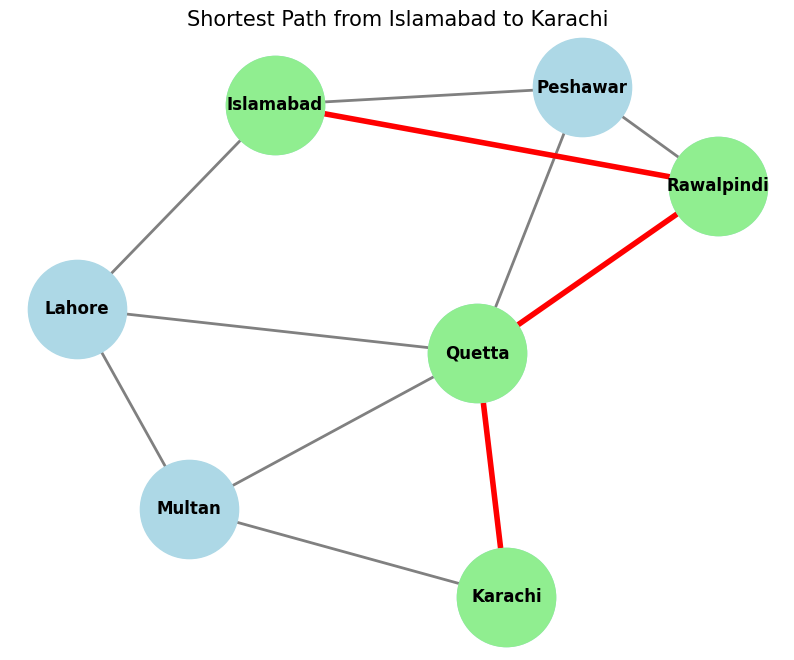

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define the cities and their connections (Graph)
graph = {
    "Islamabad": ["Rawalpindi", "Lahore", "Peshawar"],
    "Rawalpindi": ["Islamabad", "Peshawar", "Quetta"],
    "Peshawar": ["Islamabad", "Rawalpindi", "Quetta"],
    "Lahore": ["Islamabad", "Multan", "Quetta"],
    "Multan": ["Lahore", "Karachi", "Quetta"],
    "Quetta": ["Rawalpindi", "Peshawar", "Multan", "Karachi"],
    "Karachi": ["Multan", "Quetta"]
}

# Create a directed graph from the city connections
G = nx.Graph()

# Add edges (connections between cities)
edges = [
    ("Islamabad", "Rawalpindi"),
    ("Islamabad", "Lahore"),
    ("Islamabad", "Peshawar"),
    ("Rawalpindi", "Peshawar"),
    ("Rawalpindi", "Quetta"),
    ("Peshawar", "Quetta"),
    ("Lahore", "Multan"),
    ("Lahore", "Quetta"),
    ("Multan", "Karachi"),
    ("Multan", "Quetta"),
    ("Quetta", "Karachi")
]
G.add_edges_from(edges)

# Re-run the BFS function to find the shortest path
def bfs_shortest_path(graph, start, goal):
    # Keep track of the paths to be checked
    queue = deque([[start]])
    # Set to keep track of the visited cities
    visited = set()

    while queue:
        # Get the first path in the queue
        path = queue.popleft()
        # Get the last city from the path
        city = path[-1]

        # Return the path if the goal is reached
        if city == goal:
            return path

        # If the city has not been visited yet
        if city not in visited:
            # Mark the city as visited
            visited.add(city)
            # Get the neighboring cities
            for neighbor in graph[city]:
                # Create a new path with the neighbor and add it to the queue
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    return None

# Find the shortest path from Islamabad to Karachi
shortest_path = bfs_shortest_path(graph, "Islamabad", "Karachi")

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Position the nodes

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_weight="bold")

# Highlight the shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='lightgreen', node_size=5000)

# Display the graph
plt.title("Shortest Path from Islamabad to Karachi", size=15)
plt.axis("off")
plt.show()
